El conjunto de datos ya forma parte de la biblioteca Scikit-Learn, sólo tenemos que importarlo y cargarlo como un marco de datos:

In [57]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn import datasets
import seaborn as sns

iris = sns.load_dataset("iris")
iris.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [61]:
iris.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [62]:
iris.drop(('species'), axis=1, inplace=True)

In [63]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


El conjunto de datos consta de nueve atributos:

- sepal_length - Longitud del sépalo
- sepal_width - Ancho del sépalo
- petal_length - Longitud del pépalo
- petal_width - Ancho del pépalo
- species - Tipo de especie de la flor


 Con la aplicación del algoritmo de vecinos cercanos pretendemos clasificar las flores mediante el ancho de los sépalos de las flores.

In [64]:
# Vamos a crear los bins de datos para transformar nuestros valores continuos en categorías:
iris["sepal_width_S"] = pd.qcut(iris["sepal_width"], 4, retbins=False, labels=[1, 2, 3, 4])
iris["sepal_width_S"]


0      4
1      2
2      3
3      3
4      4
      ..
145    2
146    1
147    2
148    4
149    2
Name: sepal_width_S, Length: 150, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [65]:
# A continuación, podemos dividir nuestro conjunto de datos en sus atributos y etiquetas:
y = iris['sepal_width_S']
X = iris.drop(['sepal_width', 'sepal_width_S'], axis = 1)

Se crean las variables X y Y

#### Dividir los datos en conjuntos de entrenamiento y de prueba

In [66]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [67]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
X_train

array([[-1.01827123, -1.39338902, -1.3621769 ],
       [-0.7730102 , -1.33550342, -1.49647603],
       [-0.03722712,  0.74837808,  0.92090833],
       [ 0.20803391,  0.4010645 ,  0.51801093],
       [ 1.06644751,  0.51683569,  0.3837118 ],
       [-0.52774918, -1.45127462, -1.09357864],
       [-0.52774918, -1.33550342, -1.3621769 ],
       [-0.40511866, -0.06202028, -0.28778385],
       [ 0.57592545,  0.74837808,  0.3837118 ],
       [ 0.69855596,  0.97992047,  0.7866092 ],
       [ 0.94381699,  0.3431789 ,  0.24941267],
       [ 1.67960008,  1.32723405,  1.72670311],
       [-0.15985763,  0.2274077 ,  0.11511354],
       [ 2.17012213,  1.61666204,  1.18950659],
       [-0.28248815,  0.4010645 ,  0.3837118 ],
       [-0.89564072, -1.39338902, -1.3621769 ],
       [ 2.29275265,  1.67454764,  1.05520746],
       [-0.03722712,  0.16952211, -0.28778385],
       [-0.7730102 , -1.39338902, -1.3621769 ],
       [-1.01827123, -1.45127462, -1.22787777],
       [-0.89564072, -1.10396103, -1.093


### Entrenamiento y predicción para la clasificación

Después de agrupar, dividir y escalar los datos, podemos aplicarles un clasificador. Para la predicción, utilizaremos de nuevo 5 vecinos como línea de base. También puede instanciar la clase KNeighbors_ sin ningún argumento y automáticamente utilizará 5 vecinos. Aquí, en lugar de importar el KNeighborsRegressor, importaremos el KNeighborsClassifier, clase

In [69]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

#### Evaluando KNN para la clasificación


In [71]:
acc =  classifier.score(X_test, y_test)
print(acc) # 0.6191860465116279

0.42105263157894735


              precision    recall  f1-score   support

           1       0.40      0.36      0.38        11
           2       0.12      0.14      0.13         7
           3       0.31      0.40      0.35        10
           4       1.00      0.70      0.82        10

    accuracy                           0.42        38
   macro avg       0.46      0.40      0.42        38
weighted avg       0.48      0.42      0.44        38



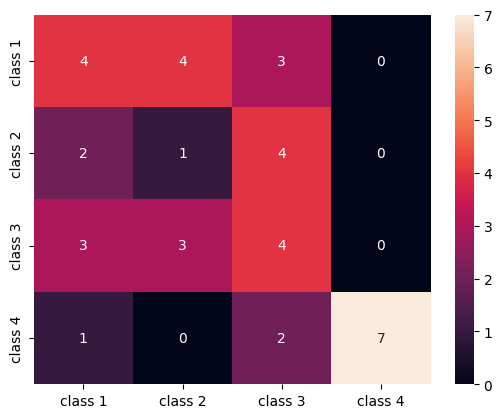

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

[[5.1 0.2]
 [4.9 0.2]
 [4.7 0.2]
 [4.6 0.2]
 [5.  0.2]
 [5.4 0.4]
 [4.6 0.3]
 [5.  0.2]
 [4.4 0.2]
 [4.9 0.1]
 [5.4 0.2]
 [4.8 0.2]
 [4.8 0.1]
 [4.3 0.1]
 [5.8 0.2]
 [5.7 0.4]
 [5.4 0.4]
 [5.1 0.3]
 [5.7 0.3]
 [5.1 0.3]
 [5.4 0.2]
 [5.1 0.4]
 [4.6 0.2]
 [5.1 0.5]
 [4.8 0.2]
 [5.  0.2]
 [5.  0.4]
 [5.2 0.2]
 [5.2 0.2]
 [4.7 0.2]
 [4.8 0.2]
 [5.4 0.4]
 [5.2 0.1]
 [5.5 0.2]
 [4.9 0.2]
 [5.  0.2]
 [5.5 0.2]
 [4.9 0.1]
 [4.4 0.2]
 [5.1 0.2]
 [5.  0.3]
 [4.5 0.3]
 [4.4 0.2]
 [5.  0.6]
 [5.1 0.4]
 [4.8 0.3]
 [5.1 0.2]
 [4.6 0.2]
 [5.3 0.2]
 [5.  0.2]
 [7.  1.4]
 [6.4 1.5]
 [6.9 1.5]
 [5.5 1.3]
 [6.5 1.5]
 [5.7 1.3]
 [6.3 1.6]
 [4.9 1. ]
 [6.6 1.3]
 [5.2 1.4]
 [5.  1. ]
 [5.9 1.5]
 [6.  1. ]
 [6.1 1.4]
 [5.6 1.3]
 [6.7 1.4]
 [5.6 1.5]
 [5.8 1. ]
 [6.2 1.5]
 [5.6 1.1]
 [5.9 1.8]
 [6.1 1.3]
 [6.3 1.5]
 [6.1 1.2]
 [6.4 1.3]
 [6.6 1.4]
 [6.8 1.4]
 [6.7 1.7]
 [6.  1.5]
 [5.7 1. ]
 [5.5 1.1]
 [5.5 1. ]
 [5.8 1.2]
 [6.  1.6]
 [5.4 1.5]
 [6.  1.6]
 [6.7 1.5]
 [6.3 1.3]
 [5.6 1.3]
 [5.5 1.3]
 [5.5 1.2]

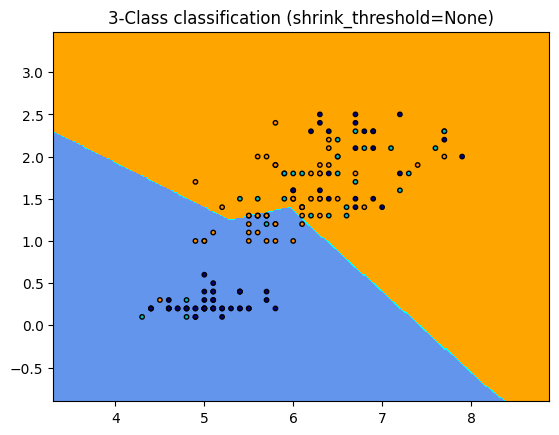

0.2 0.4


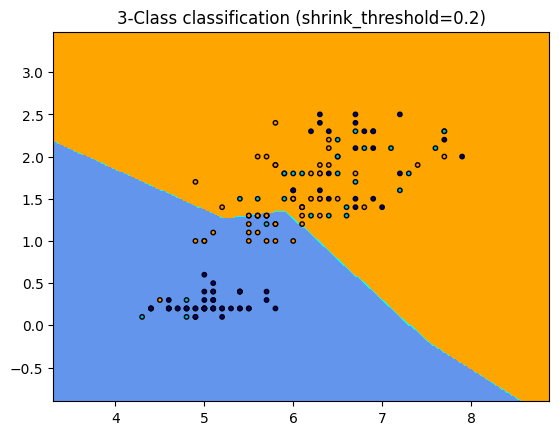

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

# Suponiendo que X es un DataFrame de pandas
X_2d = iris[["sepal_length", "petal_width"]].to_numpy()
y = iris['sepal_width_S']

# Ahora X_2d será un arreglo NumPy bidimensional con las dos variables seleccionadas
print(X_2d)

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None, 0.2]:
    # Creamos una instancia de Nearest Centroid Classifier y ajustamos los datos.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    
    # Dibujamos los límites de decisión
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Dibujamos los límites de decisión y los puntos de entrenamiento
    ax.contourf(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")
    plt.show()


#### Finding the Best K for KNN Classification

In [74]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

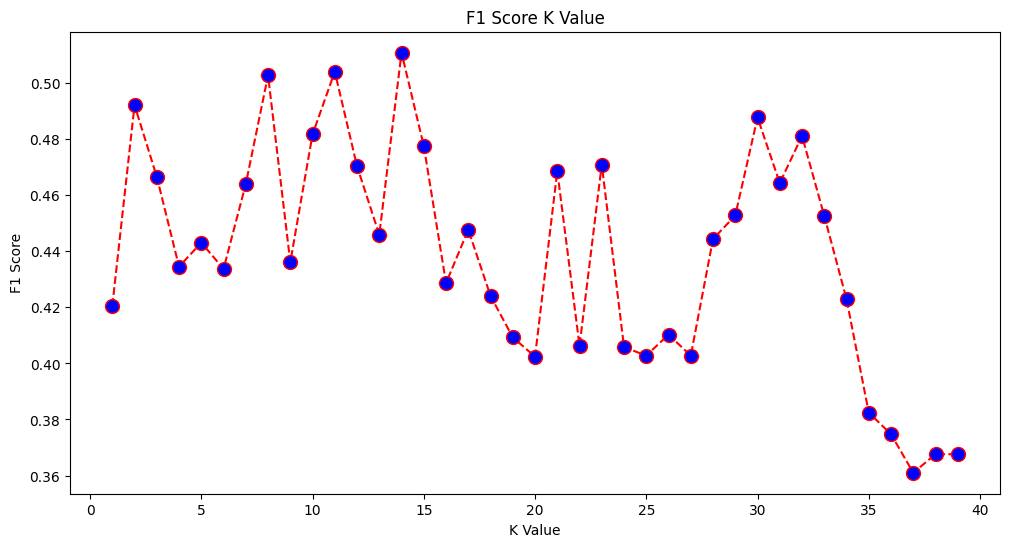

In [75]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

A partir de la salida, podemos ver que la puntuación f1 es la más alta cuando el valor de K es 14. Vamos a volver a entrenar nuestro clasificador con 14 vecinos y ver lo que hace a nuestros resultados del informe de clasificación:

In [76]:
classifier15 = KNeighborsClassifier(n_neighbors=14)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.60      0.55      0.57        11
           2       0.14      0.14      0.14         7
           3       0.38      0.50      0.43        10
           4       0.88      0.70      0.78        10

    accuracy                           0.50        38
   macro avg       0.50      0.47      0.48        38
weighted avg       0.53      0.50      0.51        38



### Implementando KNN para detección de datos atipicos con Scikit-Learn


In [77]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

Ahora tenemos 5 distancias para cada punto de datos: la distancia entre él y sus 5 vecinos, y un índice que los identifica. Echemos un vistazo a los tres primeros resultados y a la forma del array para visualizarlo mejor.

Para ver la forma de las tres primeras distancias, ejecuta:

In [78]:
distances[:3], distances.shape

(array([[0.        , 0.        , 0.0578856 , 0.11577119, 0.11577119],
        [0.        , 0.14624294, 0.18186396, 0.18186396, 0.19085398],
        [0.        , 0.        , 0.18186396, 0.19085398, 0.25145811]]),
 (112, 5))

Observe que hay 3 filas con 5 distancias cada una. También podemos mirar y los índices de los vecinos:

In [79]:
indexes[:3], indexes[:3].shape


(array([[  0,  43,  49,  24,  44],
        [  1,  18,  86,  27,  76],
        [  2,  35, 105,  32,  51]]),
 (3, 5))

Text(0, 0.5, 'Mean Distances')

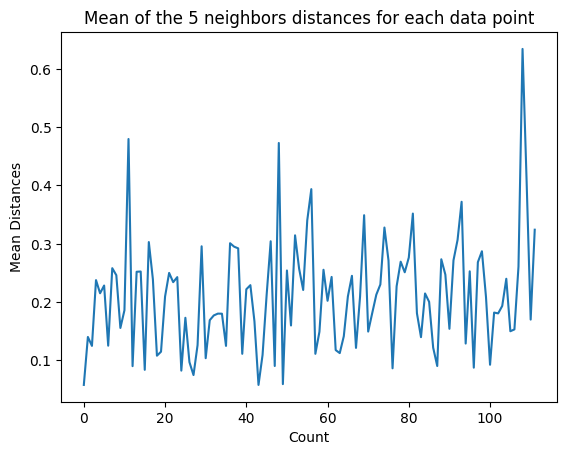

In [80]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

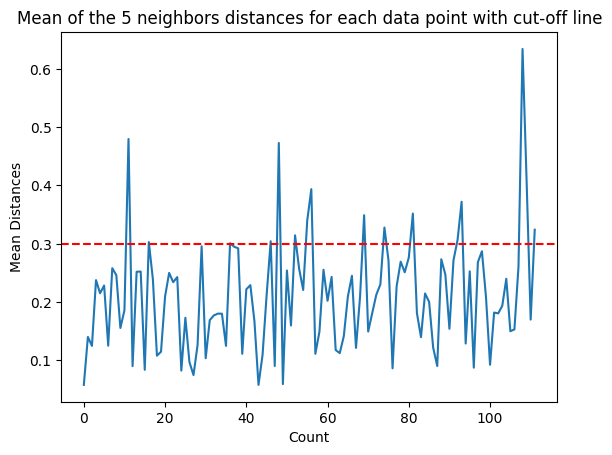

In [86]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 0.3, color = 'r', linestyle = '--')

In [87]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 0.3)
outlier_index


(array([ 11,  16,  36,  46,  48,  52,  55,  56,  69,  74,  81,  92,  93,
        108, 109, 111]),)

In [88]:
# Filter outlier values
outlier_values = iris.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width,petal_length,petal_width,sepal_width_S
11,4.8,3.4,1.6,0.2,4
16,5.4,3.9,1.3,0.4,4
36,5.5,3.5,1.3,0.2,4
46,5.1,3.8,1.6,0.2,4
48,5.3,3.7,1.5,0.2,4
52,6.9,3.1,4.9,1.5,3
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,3
69,5.6,2.5,3.9,1.1,1
74,6.4,2.9,4.3,1.3,2


Para concluir la data indica que el mejor numero de vecinos son 14, y la distancia media entre estos vecinos es de 0.3. Sin embargo no se logro una precición de más del 50%.